In [14]:
!pip install beautifulsoup4 requests
!pip install fsspec

In [15]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt
import fsspec

In [6]:
Dodgers_url = "https://www.mlbtraderumors.com/los-angeles-dodgers"
response = requests.get(Dodgers_url)
# Parse the HTML content using BeautifulSoup
Beaut_soup = BeautifulSoup(response.content, "html.parser")
article = soup.find_all("article")

In [7]:
# Create a file to save the scraped data
file_path = "C:/Users/Grigor/OneDrive/Desktop/Master_Program/ADS509/Project/dodgers.txt" 
with open(file_path, "w", encoding="utf-8") as file:
    # Initialize empty lists to store the extracted values
    titles = []
    authors = []
    dates = []
    contents = []
    
    # Iterate over the articles and extract the text
    for article in articles:
        # Extract the article title
        title_element = article.find("h2")
        title = title_element.text.strip() if title_element else ""
        titles.append(title)

        # Extract the article author
        author_element = article.find("span", class_="entry-author")
        author = author_element.text.strip() if author_element else ""
        authors.append(author)

        # Extract the article date
        date_element = article.find("time", class_="entry-time")
        date = date_element.text.strip() if date_element else ""
        dates.append(date)

        # Extract the article content
        content_element = article.find("div", class_="entry-content")
        content = content_element.text.strip() if content_element else ""
        contents.append(content)
        
        # Write the title and content to the file
        file.write("Title: " + title + "\n")
        file.write("Author: " + author + "\n")
        file.write("Date: " + date + "\n")
        file.write("Content: " + content + "\n")
        file.write("---\n")

print("Data saved to", file_path)

# Create a DataFrame from the extracted values
data = {
    "Title": titles,
    "Author": authors,
    "Date": dates,
    "Content": contents
}

df = pd.DataFrame(data)
df.head()

Data saved to C:/Users/Grigor/OneDrive/Desktop/Master_Program/ADS509/Project/dodgers.txt


,Title,Author,Date,Content
0,Julio Urias Suffers Setback In Rehab From Hams...,Nick Deeds,"June 10, 2023",Dodgers left-hander Julio Urias was set to be ...
1,William Cuevas Signs With KBO’s KT Wiz,Anthony Franco,"June 9, 2023",The KT Wiz of the Korea Baseball Organization ...
2,Best Deadline Rental Returns In Recent History...,Darragh McDonald,"June 9, 2023",With the trade deadline now less than two mont...
3,Dodgers Place Noah Syndergaard On Injured List,Steve Adams,"June 8, 2023",The Dodgers announced Thursday morning that st...
4,Trayce Thompson Likely To Miss More Than A Month,Anthony Franco,"June 7, 2023",Dodgers outfielder Trayce Thompson landed on t...


In [11]:
Attendance_url = "https://www.baseball-reference.com/teams/LAD/attend.shtml"

# Read the HTML table into a list of DataFrames
tables = pd.read_html(Attendance_url)

# Select the table of interest (index 0 in this case)
table = tables[0]

In [21]:
Dodgers_Attendance = "C:/Users/Grigor/OneDrive/Desktop/Master_Program/ADS509/Project/Dodgers_Attendance.csv"
Dodgers_Attendance

'C:/Users/Grigor/OneDrive/Desktop/Master_Program/ADS509/Project/Dodgers_Attendance.csv'

In [23]:
path = "C:/Users/Grigor/OneDrive/Desktop/Master_Program/ADS509/Project/"

Dodgers_Attendance = pd.DataFrame(pd.read_csv(path + 'Dodgers_Attendance.csv'))
Dodgers_Attendance

,Year,Tm,Lg,W,L,Finish,Playoffs,Attendance,Attend/G,Rank,Est. Payroll,PPF,BPF,Stadium
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2023.0,Los Angeles Dodgers,NL West,36.0,28.0,2.0,NaN,"1,437,473","47,916",1st of 15,"$198,971,667",101.0,104.0,Dodger Stadium
2,2022.0,Los Angeles Dodgers,NL West,111.0,51.0,1.0,Lost NLDS (3-1),"3,861,408","47,672",1st of 15,"$261,180,131",100.0,103.0,Dodger Stadium
3,2021.0,Los Angeles Dodgers,NL West,106.0,56.0,2.0,Lost NLCS (4-2),"2,804,693","34,626",1st of 15,"$248,108,334",100.0,103.0,Dodger Stadium
4,2020.0,Los Angeles Dodgers,NL West,43.0,17.0,1.0,Won WS (4-2),NaN,NaN,6th of 15,"$216,508,333",97.0,99.0,Dodger Stadium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
136,1888.0,Brooklyn Bridegrooms,AA,88.0,52.0,2.0,NaN,NaN,NaN,NaN,NaN,98.0,100.0,"Washington Park I, Ridgewood Park II"
137,1887.0,Brooklyn Grays,AA,60.0,74.0,6.0,NaN,NaN,NaN,NaN,NaN,100.0,101.0,"Washington Park I, Ridgewood Park II"
138,1886.0,Brooklyn Grays,AA,76.0,61.0,3.0,NaN,NaN,NaN,NaN,NaN,101.0,101.0,"Washington Park I, Ridgewood Park"
139,1885.0,Brooklyn Grays,AA,53.0,59.0,5.0,NaN,NaN,NaN,NaN,NaN,103.0,101.0,Washington Park I


In [25]:
Dodgers_05_df = pd.DataFrame(pd.read_csv(path + 'Dodgers_Attendance.csv'))
Dodgers_05_df = Dodgers_05_df[Dodgers_05_df["Year"] > 2004]
Dodgers_05_df

,Year,Tm,Lg,W,L,Finish,Playoffs,Attendance,Attend/G,Rank,Est. Payroll,PPF,BPF,Stadium
1,2023.0,Los Angeles Dodgers,NL West,36.0,28.0,2.0,NaN,"1,437,473","47,916",1st of 15,"$198,971,667",101.0,104.0,Dodger Stadium
2,2022.0,Los Angeles Dodgers,NL West,111.0,51.0,1.0,Lost NLDS (3-1),"3,861,408","47,672",1st of 15,"$261,180,131",100.0,103.0,Dodger Stadium
3,2021.0,Los Angeles Dodgers,NL West,106.0,56.0,2.0,Lost NLCS (4-2),"2,804,693","34,626",1st of 15,"$248,108,334",100.0,103.0,Dodger Stadium
4,2020.0,Los Angeles Dodgers,NL West,43.0,17.0,1.0,Won WS (4-2),NaN,NaN,6th of 15,"$216,508,333",97.0,99.0,Dodger Stadium
5,2019.0,Los Angeles Dodgers,NL West,106.0,56.0,1.0,Lost NLDS (3-2),"3,974,309","49,066",1st of 15,"$193,553,333",94.0,97.0,Dodger Stadium
6,2018.0,Los Angeles Dodgers,NL West,92.0,71.0,1.0,Lost WS (4-1),"3,857,500","47,043",1st of 15,"$164,703,429",96.0,98.0,Dodger Stadium
7,2017.0,Los Angeles Dodgers,NL West,104.0,58.0,1.0,Lost WS (4-3),"3,765,856","46,492",1st of 15,"$201,466,263",95.0,96.0,Dodger Stadium
8,2016.0,Los Angeles Dodgers,NL West,91.0,71.0,1.0,Lost NLCS (4-2),"3,703,312","45,720",1st of 15,"$231,342,096",96.0,97.0,Dodger Stadium
9,2015.0,Los Angeles Dodgers,NL West,92.0,70.0,1.0,Lost NLDS (3-2),"3,764,815","46,479",1st of 15,"$265,140,429",94.0,95.0,Dodger Stadium
10,2014.0,Los Angeles Dodgers,NL West,94.0,68.0,1.0,Lost NLDS (3-1),"3,782,337","46,696",1st of 15,"$233,386,026",95.0,96.0,Dodger Stadium


In [53]:
Dodgers_05_df['Est. Payroll'] = Dodgers_05_df['Est. Payroll'].replace({'\$':''}, regex = True)
Dodgers_05_df['Est. Payroll'] = Dodgers_05_df['Est. Payroll'].replace({'\,':''}, regex = True)
Dodgers_05_df['Attendance'] = Dodgers_05_df['Attendance'].replace({'\,':''}, regex = True)

Text(0.5, 1.0, 'Dodgers Payroll per year since 2005')

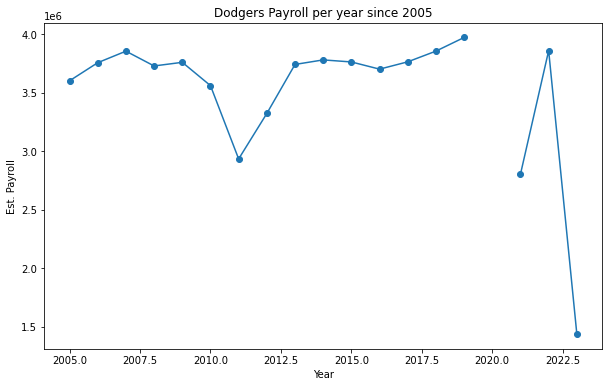

In [54]:
#plot data
Dodgers_05_df['Attendance'] = Dodgers_05_df['Attendance'].astype(float)
Dodgers_05_df.dtypes
# Plotting
plt.figure(figsize=(10, 6))

# Plotting Attendance over the years
plt.plot(Dodgers_05_df['Year'], Dodgers_05_df['Attendance'], marker='o')
plt.xlabel('Year')
plt.ylabel('Est. Payroll')
plt.title('Dodgers Attendance per year since 2005')

Text(0.5, 1.0, 'Dodgers Payroll per year since 2005')

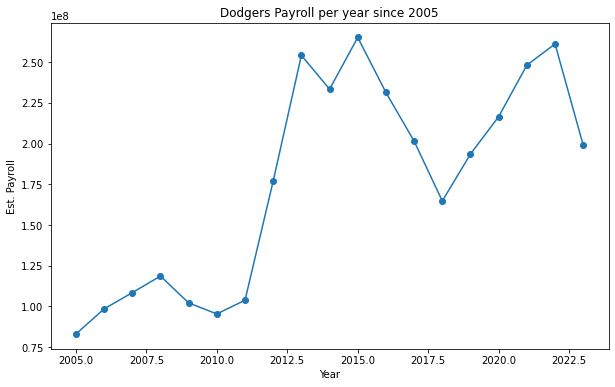

In [50]:
#plot data
Dodgers_05_df['Est. Payroll'] = Dodgers_05_df['Est. Payroll'].astype(float)
Dodgers_05_df.dtypes
# Plotting
plt.figure(figsize=(10, 6))

# Plotting Attendance over the years
plt.plot(Dodgers_05_df['Year'], Dodgers_05_df['Est. Payroll'], marker='o')
plt.xlabel('Year')
plt.ylabel('Est. Payroll')
plt.title('Dodgers Payroll per year since 2005')

Text(0.5, 0, 'Finish')

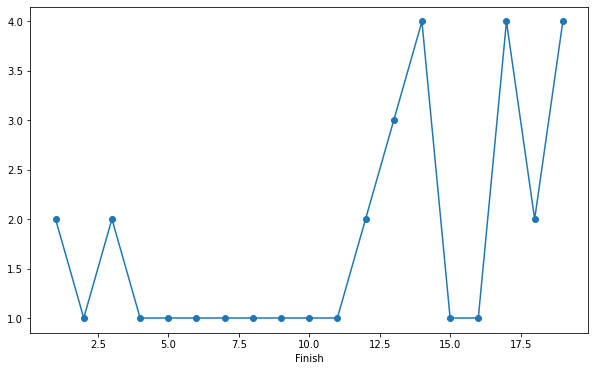

In [45]:
plt.figure(figsize=(10, 6))

# Plotting Attendance over the years
plt.plot(Dodgers_05_df['Finish'], marker='o')
plt.xlabel('Finish')


Text(0.5, 1.0, 'Dodgers Rank per year since 2005')

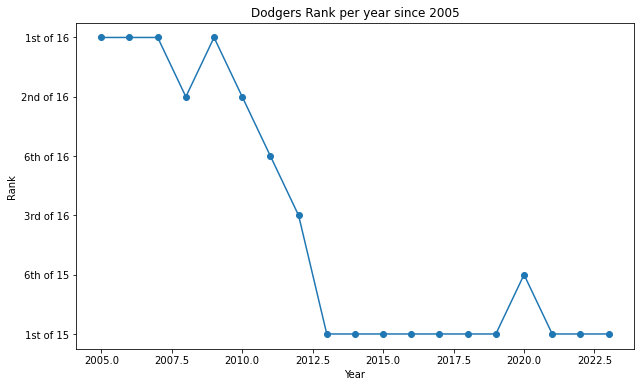

In [55]:
plt.figure(figsize=(10, 6))

# Plotting Attendance over the years
plt.plot(Dodgers_05_df['Year'], Dodgers_05_df['Rank'], marker='o')
plt.xlabel('Year')
plt.ylabel('Rank')
plt.title('Dodgers Rank per year since 2005')

In [59]:
corr = Dodgers_05_df["Est. Payroll"].corr(Dodgers_05_df['Finish'])
print(corr)

-0.6477777557448725
